hand
0.007444649368804898 0.03588000976899691 0.04271830760550096 0.10455774235112807 0.2825008632087786 0.5427941015470386
1.015895673850248


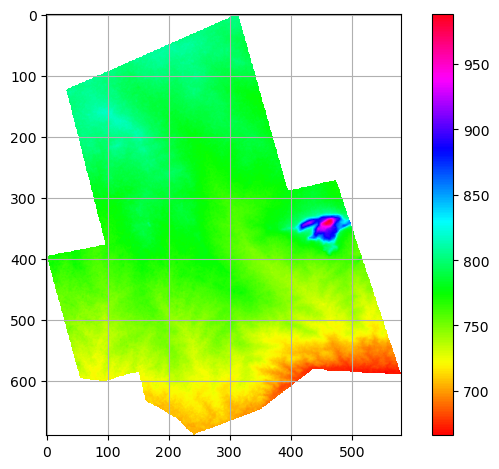

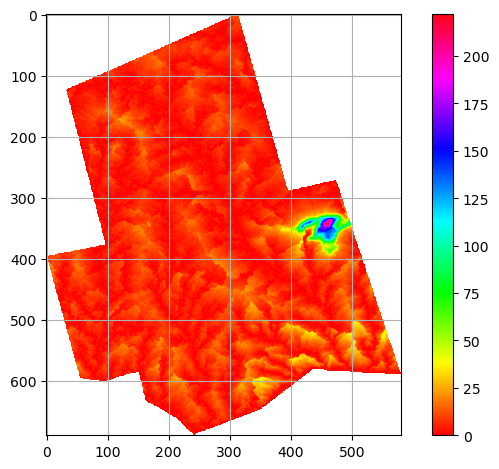

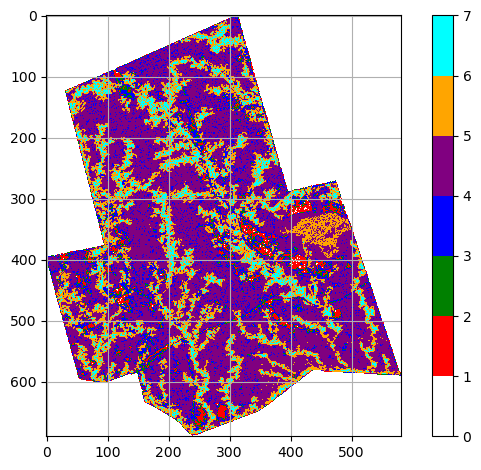

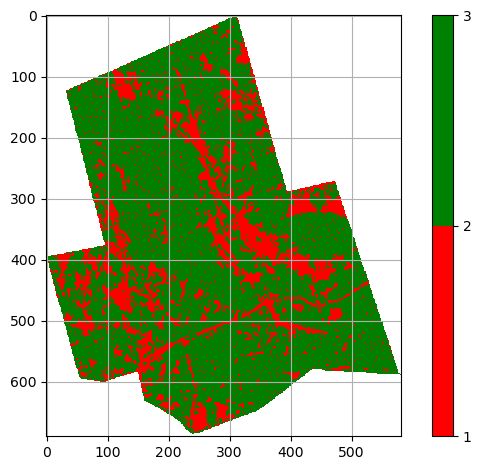

0.0


In [1]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

DEM=np.genfromtxt('maps/dem_converted.asc',  dtype=float, autostrip=True, skip_header=6)
slope=np.genfromtxt('maps/slope.asc',  dtype=float, autostrip=True, skip_header=6)
hand=np.genfromtxt('maps/HAND_use.asc',  dtype=float, autostrip=True, skip_header = 6)
basin=np.genfromtxt('maps/basin.asc',  dtype=float, autostrip=True, skip_header = 6)
classification=np.genfromtxt('maps/Classified.asc',  dtype=float, autostrip=True, skip_header = 9, usecols = range(2, 584))
#Btrying = np.genfromtxt('maps/B6_use.asc',  dtype=float, autostrip=True, skip_header = 9, usecols = range(2, 584))


#plot DEM
plt.figure(1)
DEM[DEM==65535]=np.nan
plt.imshow(DEM, cmap='hsv')
plt.colorbar()

#plot HAND

plt.figure(2)
print("hand")
hand[hand==-3.4028234663852885981e+38]=np.nan
plt.imshow(hand, cmap='hsv')
plt.colorbar()

slope[slope==-9999]=np.nan

#make landscape classification
hillslope_cl = (np.array(slope) > 5) & (np.array(classification) == 1)
#hillslope_cl = (np.array(classification) == 1)
plateau_cl = (np.array(hand) > 3) & (np.array(slope) < 5) & (np.array(classification) == 1)# slope
#plateau_cl =(np.array(classification) == 1)# slope 
wetland_cl = (np.array(hand) <= 3) & (np.array(classification) == 1)
# wetland_cl = (np.array(classification) == 1)


hillslope_un = (np.array(slope) > 5) & (np.array(classification) == 2)
#hillslope_un = (np.array(classification) == 2)
plateau_un = (np.array(hand) > 3) & (np.array(slope) < 5) & (np.array(classification) == 2)
# plateau_un = (np.array(classification) == 2)#
wetland_un = (np.array(hand) <= 3) & (np.array(classification) == 2)
# wetland_un =  (np.array(classification) == 2)
basin = np.array(basin)>0


#calculate percentages
hillslope_cl_per = float(np.sum(hillslope_cl))/np.sum(basin) # /sum(basin)
wetland_cl_per = float(np.sum(wetland_cl))/np.sum(basin)
plateau_cl_per = float(np.sum(plateau_cl))/np.sum(basin)
hillslope_un_per = float(np.sum(hillslope_un))/np.sum(basin) # /sum(basin)
wetland_un_per = float(np.sum(wetland_un))/np.sum(basin)
plateau_un_per = float(np.sum(plateau_un))/np.sum(basin)
print(hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per)
print(np.sum([hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per]))

#matrics with landscape classes
landscapes=np.zeros((690,582))
landscapes[plateau_cl]=1
landscapes[hillslope_cl]=2
landscapes[wetland_cl]=3
landscapes[plateau_un]=4
landscapes[hillslope_un]=5
landscapes[wetland_un]=6

#plot landscapes
cmap = mpl.colors.ListedColormap(['white', 'red', 'green', 'blue', 'purple', 'orange', 'cyan'])
bounds=[0,1,2,3,4,5,6,7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(3)
plt.imshow(landscapes, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()



plt.figure(4)
classification[classification==4294967295]=np.nan
cmap = mpl.colors.ListedColormap(['red', 'green'])
bounds=[1,2,3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.imshow(classification, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()


print(np.nanmin(hand))

In [2]:
df = pd.read_csv('Precipitation_all.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'PRCP']
df.columns = column_names
df["Date"] = pd.to_datetime(df['Date'], dayfirst = True)
df["PRCP"] = df["PRCP"].astype(float)

df2 = pd.read_csv('evaporation_all.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'POT_EV']
df2.columns = column_names
df2["POT_EV"] = df2["POT_EV"].astype(float)

df3 = pd.read_csv('Human.csv', header=0, usecols=[1,8])
column_names = ['Date', 'HUMAN']
df3.columns = column_names
df3["HUMAN"] = df3["HUMAN"].astype(float)

df_p = df[190:195].reset_index(drop = True)
df_e = df2[190:195].reset_index(drop = True)
df_h = df3[190:195].reset_index(drop = True)

In [3]:
df_e

,Date,POT_EV
0,7-2-2020,5.8063
1,8-2-2020,4.1943
2,9-2-2020,3.9753
3,10-2-2020,3.7090
4,11-2-2020,3.7713


In [14]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FLEXtopo import FLEXtopo

PRCP=df['PRCP']
POT_EV=df2['POT_EV']
HUMAN=df3['HUMAN']


                  #        Imax    Lp  Sumax beta Pmax Kf  
ParPlateau_cl   = np.array([0.5, 0.07, 34, 1, 2, 0.25])   
ParPlateau_un   = np.array([5, 0.07, 340, 1, 2, 0.25])
                  #        Imax    Lp    Sumax  beta, D, Pmax, Kf  
ParHillslope_cl = np.array([0.5, 0.07, 34, 1, 4, 2,0.25])
ParHillslope_un = np.array([5, 0.07, 340, 1, 4, 2,0.25])
                  #        Imax    Lp   Sumax, beta Cmax,Pmax, Kf  
ParWetland_cl   = np.array([0.5, 0.07, 34, 1, 4, 2, 0.25])
ParWetland_un   = np.array([5, 0.07, 340, 1, 4, 2, 0.25])
                          # Ks   Tlag
ParCatchment = np.array([0.0067, 2.21])

#landscape percentages
landscape_per= np.array([hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per])


WB, Si, Su, Sf, Ss, Qufdt, Qfdt, Qusdt, Qsdt, Eadt, Eidt, Pedt = FLEXtopo(ParPlateau_cl, ParHillslope_cl, ParWetland_cl, ParPlateau_un, ParHillslope_un, ParWetland_un, ParCatchment, PRCP, POT_EV, HUMAN, landscape_per)


#plt.plot(range(0,len(Qo)),Qo)
# plt.plot(range(0,len(Qm)),Qm)
# plt.show()

print(WB[0])

Pedt 0.00880000000000003 Rho 0.00880000000000003
Pedt 0.007800000000000029 Rho 0.007800000000000029
Pedt 0.0635 Rho 0.0635
Pedt 0.022199999999999998 Rho 0.022199999999999998
Pedt 0.017800000000000038 Rho 0.017800000000000038
Pedt 0.010000000000000009 Rho 0.010000000000000009
Pedt 0.07999999999999996 Rho 0.07999999999999996
Pedt 0.010000000000000009 Rho 0.010000000000000009
Pedt 0.010000000000000009 Rho 0.010000000000000009
Pedt 0.011800000000000033 Rho 0.011800000000000033
Pedt 0.032200000000000006 Rho 0.032200000000000006
Pedt 0.06220000000000003 Rho 0.06220000000000003
Pedt 0.037800000000000056 Rho 0.037800000000000056
Pedt 0.06659999999999999 Rho 0.06659999999999999
Pedt 0.09719999999999995 Rho 0.09719999999999995
Pedt 0.035599999999999965 Rho 0.035599999999999965
Pedt 0.020000000000000018 Rho 0.020000000000000018
Pedt 0.09999999999999998 Rho 0.09999999999999998
Pedt 0.032200000000000006 Rho 0.032200000000000006
Pedt 0.010000000000000009 Rho 0.010000000000000009
Pedt 0.0572000000000

962.8690091567271

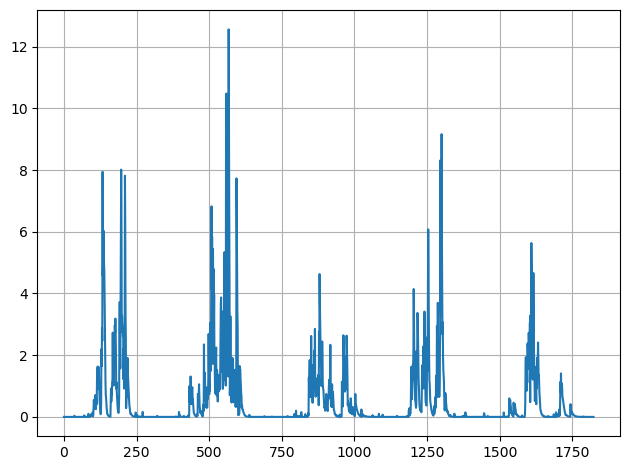

In [15]:
plt.plot(Eadt)
np.sum(Eadt)

972.5041840500071

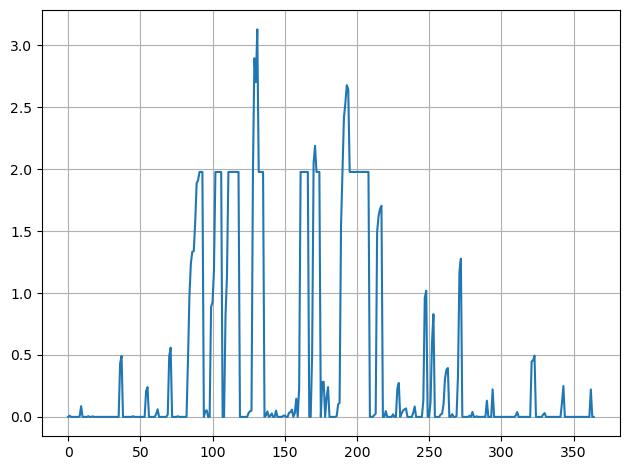

In [16]:
plt.plot(Si[0:365])
np.sum(Si)

10497.898555359552


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       3.09025733e-05, 2.64823664e-05, 2.35615453e-05])

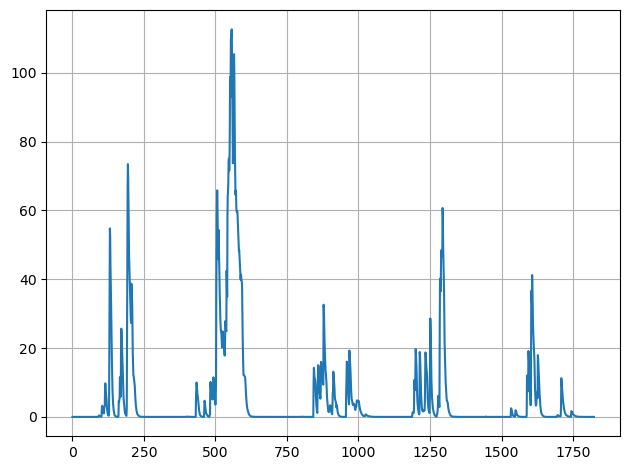

In [17]:
#plt.plot(Su[0:365])
#date = pd.to_datetime(df['Date'])
it = [1, 2, 3, 4, 5]
plt.plot(Su)
#Runs low during the year, between march and November no storage
#seems to drain very quickly
print(np.sum(Su))
Su

776.6302622529265


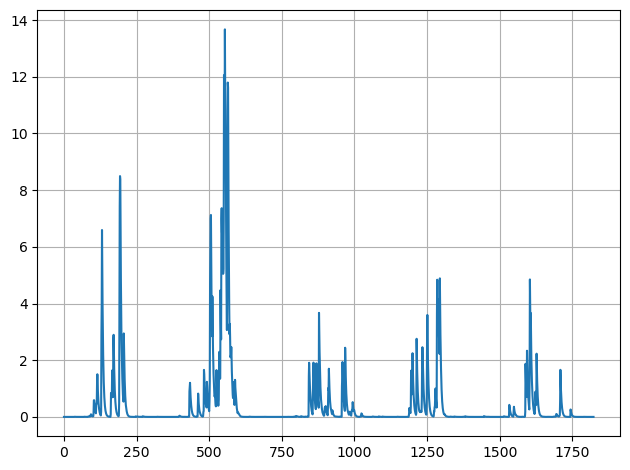

In [18]:
plt.plot(Sf)
print(np.sum(Sf))

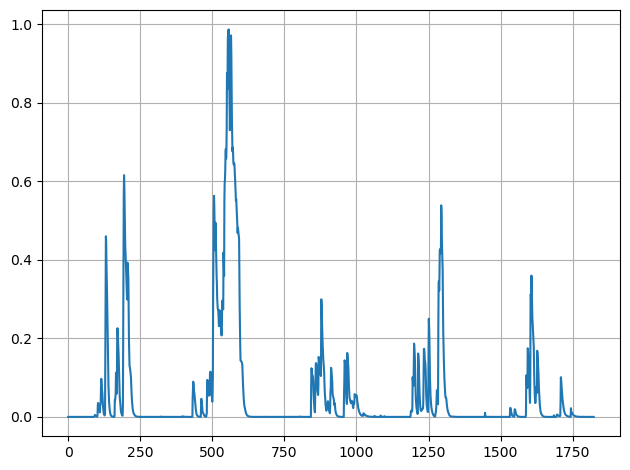

In [19]:
plt.plot(Qusdt)

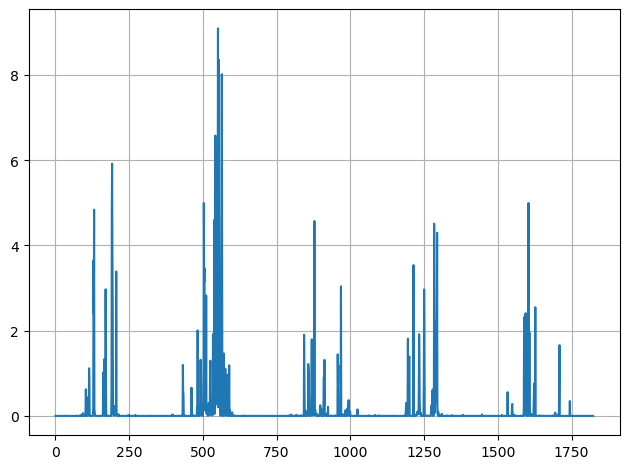

In [20]:
plt.plot(Qufdt)

39.97808179521465
1954.3682999999999


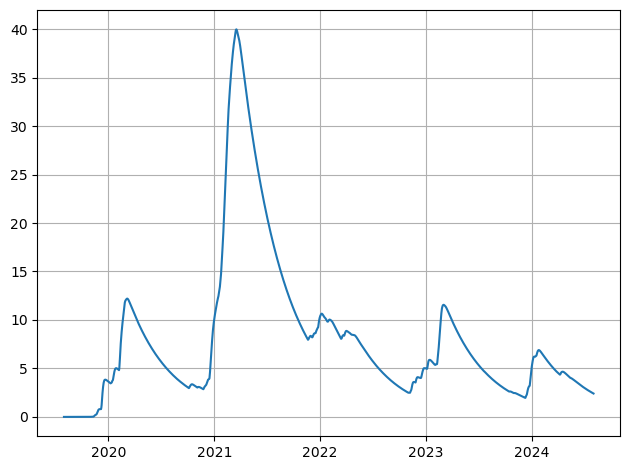

In [11]:
plt.plot(df["Date"], Ss)
print(np.max(Ss))
print(np.sum(df["PRCP"]))

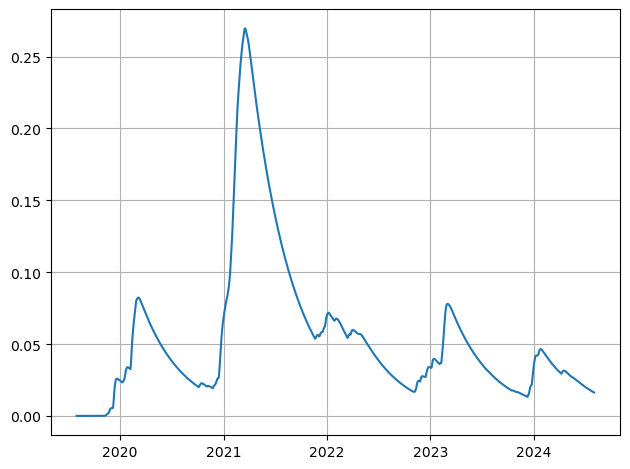

In [12]:
plt.plot(df["Date"], Qsdt)

In [13]:
# date = pd.to_datetime(df['Date'])

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)

# ax1.plot(df['Date'], df['PRCP'], label='Precipitation')
# ax1.plot(df['Date'], df2['POT_EV'], label='Evaporation')


# plt.legend()
# plt.ylabel('mm/d')
# plt.savefig(fname='PREC_EVAP', dpi=300)

In [14]:
# fig2 = plt.figure()
# ax1 = fig2.add_subplot(111)

# ax1.plot(df['Date'], df3['HUMAN'], label='Human')

# plt.ylabel('mm/d')
# plt.legend()
# plt.savefig(fname='HUMAN', dpi=300)

In [15]:
len(df)

1824

In [16]:
np.sum(df["PRCP"])

1954.3682999999999

In [17]:
np.sum(Eidt)

1272.577329003815

In [18]:
np.sum(Pedt)

529.3395927549413

In [19]:
Si[-1]

0.15210215549548184

In [20]:
np.sum(Eadt)

858.0243852597989

In [21]:
np.sum(Qusdt)

192.2304344930492

In [22]:
np.sum(Qufdt)

274.2580428837356

In [23]:
Su[-1]

1.4943147310038026e-05

In [24]:
np.sum(Qfdt)

274.25804274920057

In [25]:
Sf[-1]

1.3453500639312904e-07

In [26]:
np.sum(Qsdt)

184.40227254229

In [27]:
np.sum(df3["HUMAN"])

0.2958104241975005

In [28]:
Ss[-1]

array([7.26782182])